In [1]:
import pandas as pd
import numpy as np

##### Ex 2: Implement thuật toán PCA bằng numpy

In [2]:
def MyPCA(X, num_components):
     
    # mean Centering the data  
    X_meaned = X - np.mean(X, axis = 0)
     
    # calculating the covariance matrix of the mean-centered data.
    cov_mat = np.cov(X_meaned, rowvar = False)
     
    # Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    
    # sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    
    sorted_eigenvalue = eigen_values[sorted_index]
    #similarly sort the eigenvectors 
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    
    # select the first n eigenvectors, n is desired dimension
    # of our final reduced data.
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    
    # Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    return X_reduced

##### Ex 3: giảm dữ liệu iris về 2 chiều bằng thuật toán ở bài 2

In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
import matplotlib.pyplot as plt

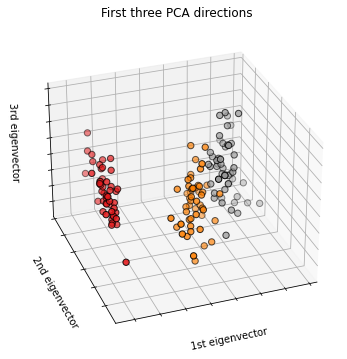

In [12]:
y = iris.target
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection = "3d", elev = -150, azim = 110)

X_reduced_MyPCA = MyPCA(iris.data, 3)
ax.scatter(X_reduced_MyPCA[:, 0], X_reduced_MyPCA[:, 1], X_reduced_MyPCA[:, 2],
           c = y, cmap = plt.cm.Set1, edgecolor = "k", s = 40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [9]:
X_reduced_MyPCA

array([[ 2.68412563,  0.31939725,  0.02791483],
       [ 2.71414169, -0.17700123,  0.21046427],
       [ 2.88899057, -0.14494943, -0.01790026],
       [ 2.74534286, -0.31829898, -0.03155937],
       [ 2.72871654,  0.32675451, -0.09007924],
       [ 2.28085963,  0.74133045, -0.16867766],
       [ 2.82053775, -0.08946138, -0.25789216],
       [ 2.62614497,  0.16338496,  0.02187932],
       [ 2.88638273, -0.57831175, -0.02075957],
       [ 2.6727558 , -0.11377425,  0.19763272],
       [ 2.50694709,  0.6450689 ,  0.07531801],
       [ 2.61275523,  0.01472994, -0.10215026],
       [ 2.78610927, -0.235112  ,  0.20684443],
       [ 3.22380374, -0.51139459, -0.06129967],
       [ 2.64475039,  1.17876464,  0.15162752],
       [ 2.38603903,  1.33806233, -0.2777769 ],
       [ 2.62352788,  0.81067951, -0.13818323],
       [ 2.64829671,  0.31184914, -0.02666832],
       [ 2.19982032,  0.87283904,  0.12030552],
       [ 2.5879864 ,  0.51356031, -0.21366517],
       [ 2.31025622,  0.39134594,  0.239

##### Ex 4:
kết quả khi dùng Sklearn

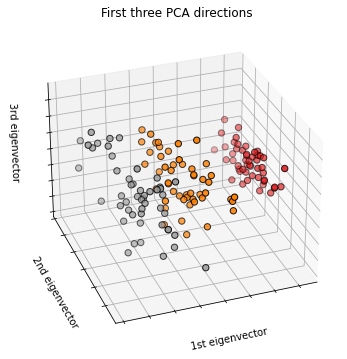

In [15]:
y = iris.target
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize = (8, 6))
ax = fig.add_subplot(111, projection = "3d", elev = -150, azim = 110)

X_reduced = PCA(n_components = 3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
    c = y, cmap = plt.cm.Set1,edgecolor ="k", s = 40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [11]:
X_reduced

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239